In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-17.549047977227346 -24.996517563388323
61.003151644461894 24.3587658906562
46.76607406268485 10.386717733292727
75.92969751379758 36.154801540694166
7.363575584397793 69.30946503435973
5.7864552252331976 -143.70509082174613
-1.2033349871519903 41.08973479898418
-85.03656805116876 94.9791902901917
-9.327103458685372 -59.12286862015375
-75.3363978650235 -39.2888556218432
-70.8940432129711 -52.611032949599505
-48.73315544037547 158.04449490929716
-60.8609048328919 169.7739629063758
-85.07980287121819 71.77683350689045
0.7222145388514178 123.62750038341807
-14.207284012113021 10.066604807441479
46.43105197312107 99.07813752692346
29.155429846501505 -177.95924906178
16.123174883599773 -100.14778576491602
45.234395581838214 -104.95462977157709
-56.4157177941236 -18.583365650213267
48.18565828003449 -7.178448706813839
42.050531272786515 40.46811826080858
-89.56604666840043 -18.039876964438832
-28.313842988467762 -120.01658868144247
26.896484847078014 -171.93985172051202
-40.5485457403495 65.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40584d6cfa33770ec4872142d430d809


In [9]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval      ")

print("------------------------------")

# Create Counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
len(city_data)

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | maceio
Processing Record 2 of Set 1 | hameenlinna
Processing Record 3 of Set 1 | landeck
Processing Record 4 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 1 | kulhudhuffushi
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | aripuana
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | gorontalo
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | moron
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | acapulco
Processing Record 19 of Set 1 | gillette
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | penzance
Pr

Processing Record 35 of Set 4 | ancud
Processing Record 36 of Set 4 | bathsheba
Processing Record 37 of Set 4 | hualmay
Processing Record 38 of Set 4 | coihaique
Processing Record 39 of Set 4 | union
Processing Record 40 of Set 4 | port hawkesbury
Processing Record 41 of Set 4 | naze
Processing Record 42 of Set 4 | ucluelet
Processing Record 43 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 44 of Set 4 | saint-denis
Processing Record 45 of Set 4 | flin flon
Processing Record 46 of Set 4 | bend
Processing Record 47 of Set 4 | antofagasta
Processing Record 48 of Set 4 | meyungs
City not found. Skipping...
Processing Record 49 of Set 4 | pangoa
Processing Record 50 of Set 4 | poplar bluff
Processing Record 1 of Set 5 | sao felix do xingu
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | ape
Processing Record 4 of Set 5 | nanakuli
Processing Record 5 of Set 5 | thanh hoa
Processing Record 6 of Set 5 | altamira
Processing Record 7 of Set 5 | black ri

Processing Record 19 of Set 8 | nipawin
Processing Record 20 of Set 8 | waipawa
Processing Record 21 of Set 8 | kinshasa
Processing Record 22 of Set 8 | gurgan
City not found. Skipping...
Processing Record 23 of Set 8 | kigoma
Processing Record 24 of Set 8 | spirit river
Processing Record 25 of Set 8 | moranbah
Processing Record 26 of Set 8 | sao filipe
Processing Record 27 of Set 8 | tefe
Processing Record 28 of Set 8 | eichenzell
Processing Record 29 of Set 8 | erzin
Processing Record 30 of Set 8 | xixiang
Processing Record 31 of Set 8 | riyadh
Processing Record 32 of Set 8 | westport
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | venice
Processing Record 35 of Set 8 | shizunai
Processing Record 36 of Set 8 | marcona
City not found. Skipping...
Processing Record 37 of Set 8 | ilulissat
Processing Record 38 of Set 8 | altagracia de orituco
Processing Record 39 of Set 8 | moche
Processing Record 40 of Set 8 | udachnyy
Processing Record 41 of Set 8 | saint anthony


Processing Record 7 of Set 12 | beruwala
Processing Record 8 of Set 12 | ahipara
Processing Record 9 of Set 12 | lethem
Processing Record 10 of Set 12 | abakaliki
Processing Record 11 of Set 12 | mocambique
City not found. Skipping...
Processing Record 12 of Set 12 | wahiawa
Processing Record 13 of Set 12 | buala
Processing Record 14 of Set 12 | tabuk
Processing Record 15 of Set 12 | qasigiannguit
Processing Record 16 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 17 of Set 12 | tabou
Processing Record 18 of Set 12 | erenhot
Processing Record 19 of Set 12 | paracuru
Processing Record 20 of Set 12 | maymanak
City not found. Skipping...
Processing Record 21 of Set 12 | guiberoua
Processing Record 22 of Set 12 | mongo
Processing Record 23 of Set 12 | flinders
Processing Record 24 of Set 12 | bud
Processing Record 25 of Set 12 | carlyle
Processing Record 26 of Set 12 | lac du bonnet
Processing Record 27 of Set 12 | luwuk
Processing Record 28 of Set 12 | byron bay
P

551

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maceio,-9.6658,-35.7353,72.84,94,20,4.61,BR,2022-09-26 00:52:39
1,Hameenlinna,60.9960,24.4643,40.14,94,100,4.03,FI,2022-09-26 00:52:39
2,Landeck,47.1301,10.5636,48.94,93,100,1.90,AT,2022-09-26 00:52:40
3,Kulhudhuffushi,6.6221,73.0700,82.29,75,79,12.39,MV,2022-09-26 00:52:40
4,Atuona,-9.8000,-139.0333,77.32,76,39,21.05,PF,2022-09-26 00:52:41
5,Albany,42.6001,-73.9662,61.21,90,100,4.61,US,2022-09-26 00:50:25
6,Aripuana,-9.1667,-60.6333,80.47,43,1,1.59,BR,2022-09-26 00:52:42
7,Ushuaia,-54.8000,-68.3000,46.06,57,75,8.05,AR,2022-09-26 00:50:30
8,Tuatapere,-46.1333,167.6833,62.20,56,66,1.03,NZ,2022-09-26 00:52:42
9,Bluff,-46.6000,168.3333,55.18,76,74,3.18,NZ,2022-09-26 00:52:43


In [13]:
# Reorder columns for DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maceio,BR,2022-09-26 00:52:39,-9.6658,-35.7353,72.84,94,20,4.61
1,Hameenlinna,FI,2022-09-26 00:52:39,60.9960,24.4643,40.14,94,100,4.03
2,Landeck,AT,2022-09-26 00:52:40,47.1301,10.5636,48.94,93,100,1.90
3,Kulhudhuffushi,MV,2022-09-26 00:52:40,6.6221,73.0700,82.29,75,79,12.39
4,Atuona,PF,2022-09-26 00:52:41,-9.8000,-139.0333,77.32,76,39,21.05
5,Albany,US,2022-09-26 00:50:25,42.6001,-73.9662,61.21,90,100,4.61
6,Aripuana,BR,2022-09-26 00:52:42,-9.1667,-60.6333,80.47,43,1,1.59
7,Ushuaia,AR,2022-09-26 00:50:30,-54.8000,-68.3000,46.06,57,75,8.05
8,Tuatapere,NZ,2022-09-26 00:52:42,-46.1333,167.6833,62.20,56,66,1.03
9,Bluff,NZ,2022-09-26 00:52:43,-46.6000,168.3333,55.18,76,74,3.18


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Graph latitude vs temperature in a scatter plot
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]


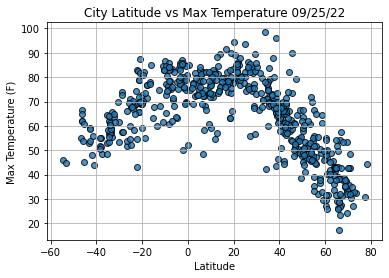

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8, label="Cities")

# incoroporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

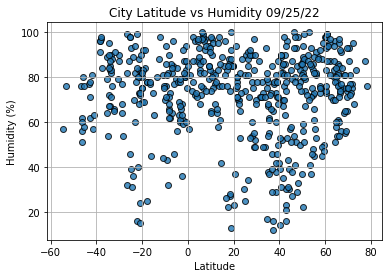

In [19]:
# Build the scatter plot for latitude vs humidity

plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8, label="Cities")

# incoroporate the other graph properties.
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

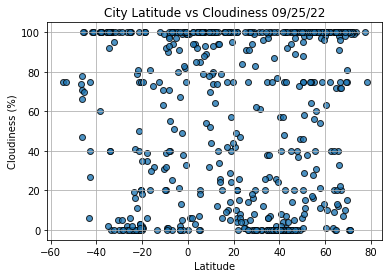

In [20]:
# Build the scatter plot for latitude vs cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8, label="Cities")

# incoroporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

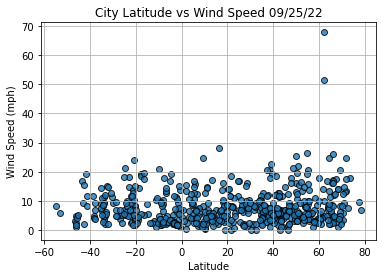

In [21]:
# Build the scatter plot for latitude vs windspeed

plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8, label="Cities")

# incoroporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()